In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

In [3]:
New_York_rect = ((-74.25559,-73.70001), (40.49612,40.91553)) #границы Нью-Йорка 

In [4]:
data = pd.read_csv("yellow_tripdata_2016-05.csv")
print(data.shape)
data.head()

(11836853, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [5]:
data.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [6]:
#отфильтруем данные
data = data.loc[(data['passenger_count']!= 0) & 
                    (data['trip_distance']!= 0) & 
                    (data['tpep_pickup_datetime']!=data['tpep_dropoff_datetime'])
                  &(((data['pickup_longitude'] > New_York_rect[0][0]) & (data['pickup_longitude'] < New_York_rect[0][1]))
                &((data['pickup_latitude'] > New_York_rect[1][0]) & (data['pickup_latitude'] < New_York_rect[1][1])))]

In [7]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836837,2,2016-05-31 23:53:01,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818,1,N,-73.974274,40.779797,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16
11836838,2,2016-05-31 23:53:02,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942,1,N,-73.893929,40.731426,1,42.0,0.5,0.5,8.66,0.0,0.3,51.96
11836839,2,2016-05-31 23:53:02,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723,1,N,-73.999580,40.743649,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56
11836840,2,2016-05-31 23:53:03,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862,1,N,-73.952637,40.766491,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76


In [8]:
# data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'],  format="%Y-%m-%d %H:%M:%S")
# data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], format="%Y-%m-%d %H:%M:%S")
# data['hour'] = data['tpep_pickup_datetime'].hour

In [9]:
data['date'] = data['tpep_pickup_datetime'].apply(lambda x: x.split(' ')[0])
data['hour'] = data['tpep_pickup_datetime'].apply(lambda x: int(x.split(' ')[1].split(':')[0]))

In [10]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date,hour
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,...,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,2016-05-01,0
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,...,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,2016-05-01,0
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,...,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,2016-05-01,0
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,...,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,2016-05-01,0
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,...,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,2016-05-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836837,2,2016-05-31 23:53:01,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818,1,N,-73.974274,...,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16,2016-05-31,23
11836838,2,2016-05-31 23:53:02,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942,1,N,-73.893929,...,1,42.0,0.5,0.5,8.66,0.0,0.3,51.96,2016-05-31,23
11836839,2,2016-05-31 23:53:02,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723,1,N,-73.999580,...,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,2016-05-31,23
11836840,2,2016-05-31 23:53:03,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862,1,N,-73.952637,...,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76,2016-05-31,23


In [11]:
regions = pd.read_csv("regions.csv", sep=';', index_col='region')
print(regions.shape)
regions.head()

(2500, 4)


,west,east,south,north
region,,,,
1,-74.25559,-74.244478,40.496120,40.504508
2,-74.25559,-74.244478,40.504508,40.512896
3,-74.25559,-74.244478,40.512896,40.521285
4,-74.25559,-74.244478,40.521285,40.529673
5,-74.25559,-74.244478,40.529673,40.538061


In [12]:
New_York_rect[0][1]

-73.70001

In [13]:
def region_index(lo, la): #lo - longitude (долгота), la - latitude (широта)
    lo_step = (New_York_rect[0][1] - New_York_rect[0][0])/50 # шаг по долготе
    la_step = (New_York_rect[1][1] - New_York_rect[1][0])/50 # latitude step
    H = (lo - New_York_rect[0][0])//lo_step
    W = (la - New_York_rect[1][0])//la_step
    #движения слево-направо , снизу - вверх
    return W + 50*H + 1

In [14]:
data['region_index'] = region_index(data['pickup_longitude'], data['pickup_latitude']).astype('int')

In [15]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date,hour,region_index
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,...,15.0,0.5,0.5,1.50,0.0,0.3,17.80,2016-05-01,0,1233
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,...,7.5,0.5,0.5,0.88,0.0,0.3,9.68,2016-05-01,0,1180
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,...,6.5,0.5,0.5,1.56,0.0,0.3,9.36,2016-05-01,0,1180
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,...,17.0,0.5,0.5,3.66,0.0,0.3,21.96,2016-05-01,0,1173
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,...,6.0,0.5,0.5,1.46,0.0,0.3,8.76,2016-05-01,0,1130


In [16]:
regions.iloc[1233] #1 срока лежит в пределах, регион совпадает с табличным

west    -73.988912
east    -73.977800
south    40.772931
north    40.781319
Name: 1234, dtype: float64

In [29]:
pv_table = pd.pivot_table(data, values=['trip_distance'], aggfunc='count', index=['date', 'hour'], columns=['region_index'], fill_value=0, margins_name='count')

KeyError: 'count'

In [18]:
pv_table = pv_table.rename(columns={'trip_distance': 'count'})
pv_table.head(30)

count                                               ...       \
region_index     15   16   25   27   32   45   49   61   77   80    ... 2476   
date       hour                                                     ...        
2016-05-01 0        0    0    0    0    0    0    0    0    0    0  ...    0   
           1        0    0    0    0    0    0    0    0    0    0  ...    0   
           2        0    0    0    0    0    0    0    0    0    0  ...    0   
           3        0    0    0    0    0    0    0    0    0    0  ...    0   
           4        0    0    0    0    0    0    0    0    0    0  ...    0   
           5        0    0    0    0    0    0    0    0    0    0  ...    0   
           6        0    0    0    0    0    0    0    0    0    0  ...    0   
           7        0    0    0    0    0    0    0    0    0    0  ...    0   
           8        0    0    0    0    0    0    0    0    0    0  ...    0   
           9        0    0    0    0    0    0    0    0    0    0  ...    0   
           10       0    0    0    0    0    0    0    0    0    0  ...    0   
           11       0    0    0    0    0    0    0    0    0    0  ...    0   
           12       0    0    0    0    0    0    0    0    0    0  ...    0   
           13       0    0    0    0    0    0    0    0    0    0  ...    0   
           14       0    0    0    0    0    0    0    0    0    0  ...    0   
           15       0    0    0    0    0    0    0    0    0    0  ...    0   
           16       0    0    0    0    0    0    0    0    0    0  ...    0   
           17       0    0    0    0    1    0    0    0    0    0  ...    0   
           18       0    0    0    0    0    0    0    0    0    0  ...    0   
           19       0    0    0    0    0    0    0    0    0    0  ...    0   
           20       0    0    0    0    0    0    0    0    0    0  ...    0   
           21       0    0    0    0    0    0    0    0    0    0  ...    0   
           22       0    0    0    0    0    0    0    0    0    0  ...    0   
           23       0    0    0    0    0    0    0    0    0    0  ...    0   
2016-05-02 0        0    0    0    0    0    0    0    0    0    0  ...    0   
           1        0    0    0    0    0    0    0    0    0    0  ...    0   
           2        0    0    0    0    0    0    0    0    0    0  ...    0   
           3        0    0    0    0    0    0    0    0    0    0  ...    0   
           4        0    0    0    0    0    0    0    0    0    0  ...    0   
           5        0    0    0    0    0    0    0    0    0    0  ...    0   

                                                              
region_index    2478 2479 2481 2482 2483 2484 2485 2486 2487  
date       hour                                               
2016-05-01 0       0    0    0    0    0    0    0    0    0  
           1       0    0    0    0    0    0    0    0    0  
           2       0    0    0    0    0    0    0    0    0  
           3       0    0    0    0    0    0    0    0    0  
           4       0    0    0    0    0    0    0    0    0  
           5       0    0    0    0    0    0    0    0    0  
           6       0    0    0    0    0    0    0    0    0  
           7       0    0    0    0    0    0    0    0    0  
           8       0    0    0    0    0    0    0    0    0  
           9       0    0    0    0    0    0    0    0    0  
           10      0    0    0    0    0    0    0    0    0  
           11      0    0    0    0    0    0    0    0    0  
           12      0    0    0    0    0    0    0    0    0  
           13      0    0    0    0    0    0    0    0    0  
           14      0    0    0    0    0    0    0    0    0  
           15      0    0    0    0    0    0    0    0    0  
           16      0    0    0    0    0    1    0    0    0  
           17      0    0    0    0    0    0    0    0    0  
           18      0    0    0    0    0    0    0  

In [19]:
pv_table.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 744 entries, ('2016-05-01', 0) to ('2016-05-31', 23)
Columns: 1217 entries, ('count', 15) to ('count', 2487)
dtypes: int64(1217)
memory usage: 6.9+ MB


In [20]:
pv_table.columns

MultiIndex([('count',   15),
            ('count',   16),
            ('count',   25),
            ('count',   27),
            ('count',   32),
            ('count',   45),
            ('count',   49),
            ('count',   61),
            ('count',   77),
            ('count',   80),
            ...
            ('count', 2476),
            ('count', 2478),
            ('count', 2479),
            ('count', 2481),
            ('count', 2482),
            ('count', 2483),
            ('count', 2484),
            ('count', 2485),
            ('count', 2486),
            ('count', 2487)],
           names=[None, 'region_index'], length=1217)

In [21]:
for k in range(1, 2501):
    if ('count', k) not in pv_table.columns:
        pv_table[('count', k)] = pd.Series(np.zeros((pv_table.shape[0], )))
#         pv_table[('count', k)] = pv_table[('count', k)].fillna(0).astype('int')
pv_table = pv_table.fillna(0).astype('int')
pv_table = pv_table.reindex(columns=sorted(pv_table.columns))
pv_table.head(1)

count                                               ...       \
region_index     1    2    3    4    5    6    7    8    9    10    ... 2491   
date       hour                                                     ...        
2016-05-01 0        0    0    0    0    0    0    0    0    0    0  ...    0   

                                                              
region_index    2492 2493 2494 2495 2496 2497 2498 2499 2500  
date       hour                                               
2016-05-01 0       0    0    0    0    0    0    0    0    0  

[1 rows x 2500 columns]

In [22]:
# Сколько пар час-ячейка, для которых не было совершено ни одной поездки?
null_sum = 0
for x in pv_table:
    null_sum += (pv_table[x] == 0).sum()
print(null_sum)

1718238


In [23]:
# График поездки из ячейки с Empire State Building
ESB = (-73.9857, 40.7485)
ESB_index = int(region_index(ESB[0], ESB[1]))
ESB_index

1231

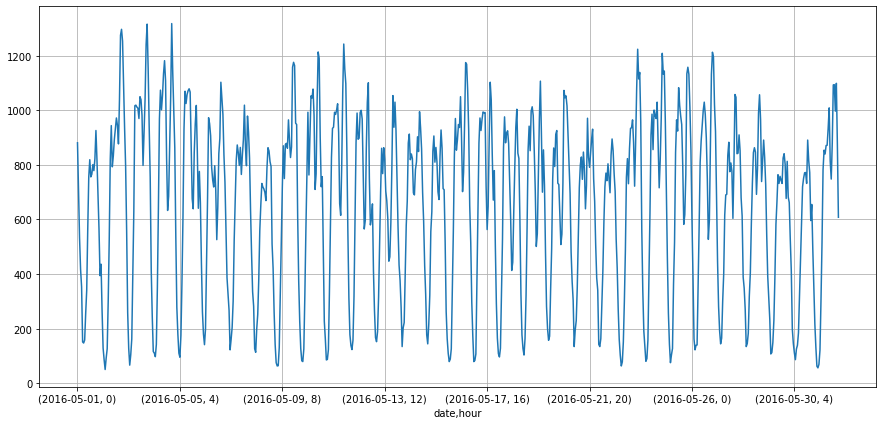

In [24]:
import matplotlib.pyplot as plt
pv_table[('count', ESB_index)].plot(figsize =(15, 7))
plt.grid(True)

In [25]:
# pv_table.to_csv("agg_tripdata_2016-05.csv")

In [33]:
df_to_save = pd.DataFrame(pv_table.to_records())
columns_to_rename = [('count', i) for i in np.arange(1, 25001)]
df_to_save = df_to_save.rename(columns={str(x[1]): x[0]+1 for x in enumerate(columns_to_rename)})
df_to_save.to_csv("agg_tripdata_2016-05.csv")